In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

 data			 kaggle.json   test1.jpg    'test 3.jpg'
 face-mask-dataset.zip	 sample_data  'test 2.png'


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1378.jpg', 'with_mask_1114.jpg', 'with_mask_3670.jpg', 'with_mask_2.jpg', 'with_mask_3264.jpg']
['with_mask_306.jpg', 'with_mask_801.jpg', 'with_mask_1251.jpg', 'with_mask_408.jpg', 'with_mask_1068.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2949.jpg', 'without_mask_989.jpg', 'without_mask_1616.jpg', 'without_mask_2144.jpg', 'without_mask_3694.jpg']
['without_mask_490.jpg', 'without_mask_749.jpg', 'without_mask_2719.jpg', 'without_mask_2065.jpg', 'without_mask_1845.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

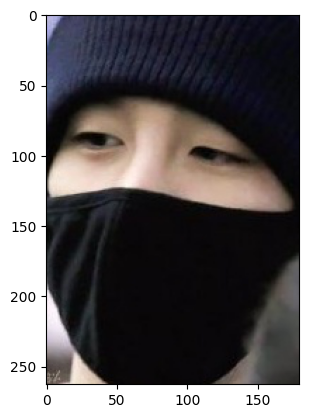

In [59]:

img = mpimg.imread('/content/data/with_mask/with_mask_113.jpg')
imgplot = plt.imshow(img)
plt.show()

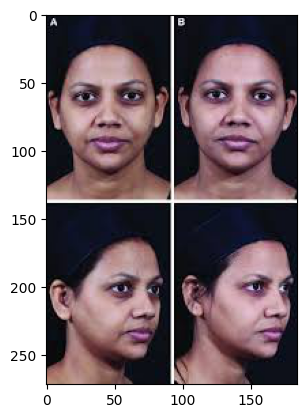

In [61]:

img = mpimg.imread('/content/data/without_mask/without_mask_1465.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:


with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[251, 255, 251],
        [253, 255, 255],
        [255, 254, 255],
        ...,
        [128, 117, 115],
        [128, 117, 115],
        [128, 117, 115]],

       [[252, 255, 253],
        [254, 255, 255],
        [255, 255, 255],
        ...,
        [126, 115, 113],
        [127, 116, 114],
        [127, 116, 114]],

       [[253, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [126, 115, 112],
        [125, 114, 112],
        [123, 112, 110]],

       ...,

       [[255, 255, 252],
        [255, 253, 254],
        [255, 253, 252],
        ...,
        [118, 108, 230],
        [129, 118, 239],
        [144, 133, 252]],

       [[255, 255, 252],
        [255, 253, 254],
        [255, 253, 252],
        ...,
        [109,  99, 221],
        [121, 110, 230],
        [137, 126, 246]],

       [[255, 255, 252],
        [255, 253, 251],
        [255, 253, 252],
        ...,
        [106,  97, 214],
        [116, 105, 222],
        [130, 120, 237]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:


X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:


X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[ 41,  51,  53],
        [ 41,  51,  53],
        [ 41,  50,  55],
        ...,
        [ 43,  46,  52],
        [ 48,  51,  56],
        [ 50,  53,  58]],

       [[ 41,  51,  53],
        [ 41,  51,  53],
        [ 41,  50,  55],
        ...,
        [ 46,  49,  54],
        [ 48,  51,  56],
        [ 50,  53,  57]],

       [[ 41,  51,  53],
        [ 41,  51,  53],
        [ 40,  50,  54],
        ...,
        [ 51,  54,  59],
        [ 49,  52,  57],
        [ 49,  52,  57]],

       ...,

       [[104,  88,  79],
        [ 92,  79,  71],
        [ 68,  60,  54],
        ...,
        [178, 192, 202],
        [178, 192, 202],
        [178, 192, 202]],

       [[168, 149, 138],
        [141, 125, 115],
        [ 84,  74,  67],
        ...,
        [172, 187, 198],
        [173, 187, 198],
        [173, 187, 198]],

       [[208, 190, 180],
        [172, 157, 148],
        [ 95,  87,  80],
        ...,
        [170, 184, 195],
        [170, 184, 195],
        [170, 184, 195]]

In [ ]:
X_train_scaled[0]

array([[[0.16078431, 0.2       , 0.20784314],
        [0.16078431, 0.2       , 0.20784314],
        [0.16078431, 0.19607843, 0.21568627],
        ...,
        [0.16862745, 0.18039216, 0.20392157],
        [0.18823529, 0.2       , 0.21960784],
        [0.19607843, 0.20784314, 0.22745098]],

       [[0.16078431, 0.2       , 0.20784314],
        [0.16078431, 0.2       , 0.20784314],
        [0.16078431, 0.19607843, 0.21568627],
        ...,
        [0.18039216, 0.19215686, 0.21176471],
        [0.18823529, 0.2       , 0.21960784],
        [0.19607843, 0.20784314, 0.22352941]],

       [[0.16078431, 0.2       , 0.20784314],
        [0.16078431, 0.2       , 0.20784314],
        [0.15686275, 0.19607843, 0.21176471],
        ...,
        [0.2       , 0.21176471, 0.23137255],
        [0.19215686, 0.20392157, 0.22352941],
        [0.19215686, 0.20392157, 0.22352941]],

       ...,

       [[0.40784314, 0.34509804, 0.30980392],
        [0.36078431, 0.30980392, 0.27843137],
        [0.26666667, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [51]:

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50)

Epoch 1/50
170/170 [==============================] - 3s 20ms/step - loss: 0.0330 - acc: 0.9903 - val_loss: 0.4325 - val_acc: 0.9273
Epoch 2/50
170/170 [==============================] - 3s 18ms/step - loss: 0.0388 - acc: 0.9877 - val_loss: 0.4591 - val_acc: 0.9240
Epoch 3/50
170/170 [==============================] - 3s 17ms/step - loss: 0.0314 - acc: 0.9910 - val_loss: 0.5119 - val_acc: 0.9174
Epoch 4/50
170/170 [==============================] - 3s 17ms/step - loss: 0.0283 - acc: 0.9919 - val_loss: 0.6198 - val_acc: 0.9223
Epoch 5/50
170/170 [==============================] - 3s 17ms/step - loss: 0.0256 - acc: 0.9912 - val_loss: 0.5646 - val_acc: 0.9190
Epoch 6/50
170/170 [==============================] - 3s 18ms/step - loss: 0.0281 - acc: 0.9915 - val_loss: 0.4009 - val_acc: 0.9306
Epoch 7/50
170/170 [==============================] - 3s 17ms/step - loss: 0.0294 - acc: 0.9903 - val_loss: 0.4684 - val_acc: 0.9273
Epoch 8/50
170/170 [==============================] - 3s 17ms/step - 

**Model Evaluation**

In [52]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', round(accuracy*100,2))

48/48 [==============================] - 0s 8ms/step - loss: 0.3598 - acc: 0.9437
Test Accuracy = 94.37


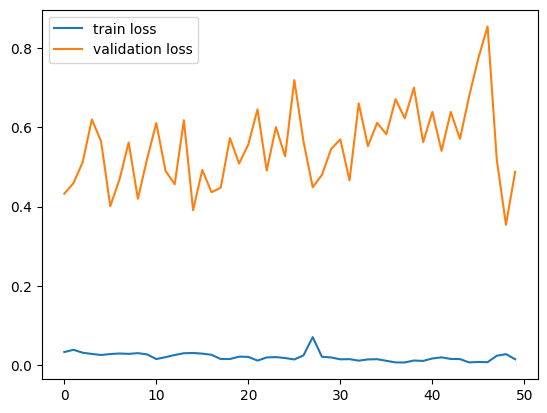

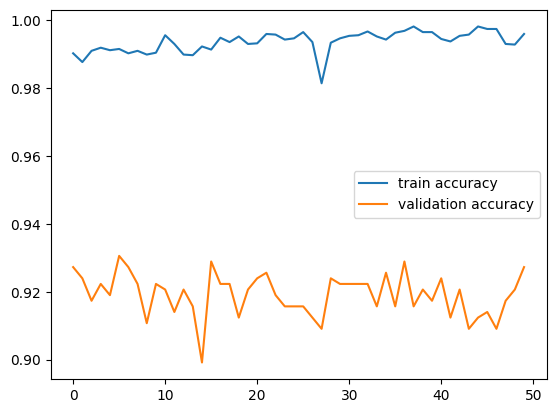

In [62]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/with_mask_1019.jpg


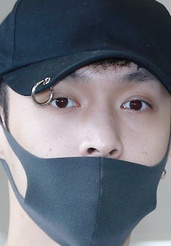

1/1 [==============================] - 0s 21ms/step
[[0.27763197 0.99980694]]
1
The person in the image is wearing a mask


In [53]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1000.jpg


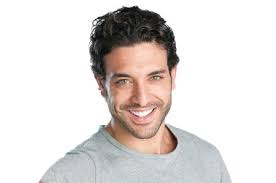

1/1 [==============================] - 0s 22ms/step
[[0.96725553 0.32755455]]
0
The person in the image is not wearing a mask


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')